In [ ]:
# Import all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
# The following command imports the CSV dataset using pandas:
import io
from google.colab import files
uploaded = files.upload()
df =pd.read_csv(io.BytesIO(uploaded['Cocooncenter_pharmacy.csv']))
df.head(10)

Saving Cocooncenter_pharmacy.csv to Cocooncenter_pharmacy (3).csv


,EAN_code,product_cat,brand,form,volume,price,description,num_review,overall_rate,overall_prod_qual,customer_id,age_group,gender,customer_loc,cus_rev_num,review_vote,customer_rate,product_qual,recommend,head_review,body_review,review_date
0,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,ALDHAFEERI,35-44,male,SAUDI ARABIA,4,0,5,5,yes,great,great item fast shipping buy,4 hours ago
1,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Rana,25-34,female,not available,2,0,5,5,yes,love,bought month like productand second time bought,2 days ago
2,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Evoo,25-34,female,Saudi Arabia,4,0,5,5,yes,perfect moisture,bought sister perfect moisture ever used,11 days ago
3,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Uvva,35-44,female,"Riga, Latvia",2,0,5,5,yes,best experience,family happy wonderful product winter season s...,23 days ago
4,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Marie PC,45-54,female,UK,4,0,5,5,yes,best moisturiser dry skin,used product many year never failed family hig...,a month ago
5,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Hidaweya,35-44,female,Bahrain,9,5,5,5,yes,best cream,second time buy good sensitive skin,2 months ago
6,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Bulanina,35-44,female,Kingston,1,1,5,5,yes,miss,soo happy product thanks cleared dry skin crea...,2 months ago
7,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Abdullah,25-34,male,Oman,1,1,5,5,yes,mr,recommend product used happy result,2 months ago
8,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Rosa,45-54,female,Newcastle,1,1,5,5,yes,good product,order product month ago satisfied came time ex...,3 months ago
9,3401326306048,Body Moisturisers,Bioderma,Cream,500,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Elowiisa,25-34,female,London,1,1,5,5,not available,life changer,using cream 9 month happy skin changed,4 months ago


In [ ]:
# explore the data a little bit by checking the number of rows and columns in our datasets.

df.shape

(1539, 22)

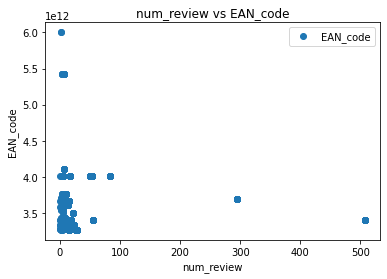

In [ ]:
# let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script :

df.plot(x='num_review', y='EAN_code', style='o')  
plt.title('num_review vs EAN_code')  
plt.xlabel('num_review')  
plt.ylabel('EAN_code')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


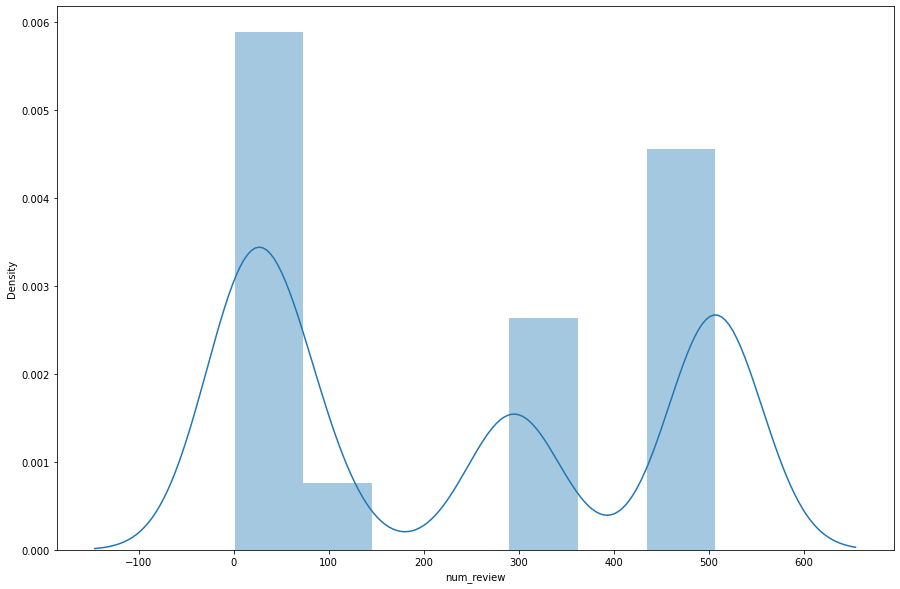

In [ ]:
#check the average price and once we plot it we can observe that the Average price is Between Nearly 25 and 35.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['num_review'])

In [ ]:
# Our next step is to divide the data into “attributes” and “labels”
X = df['num_review'].values.reshape(-1,1)
y = df['EAN_code'].values.reshape(-1,1)


In [ ]:
# we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[3.66301163e+12]
[[-3.90530943e+08]]


In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,3700281702293,3.547805e+12
1,3760095251929,3.658716e+12
2,3661434004858,3.658325e+12
3,3282779405485,3.658325e+12
4,3401040503488,3.655592e+12
5,3401326306048,3.465012e+12
6,3700281702293,3.547805e+12
7,3700281702293,3.547805e+12
8,3401326306048,3.465012e+12
9,3606000551954,3.657544e+12


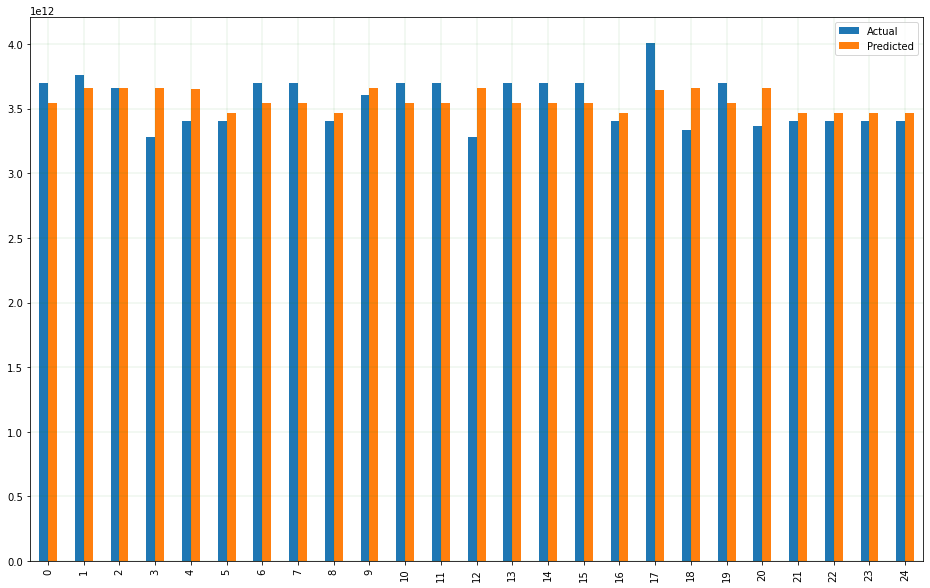

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

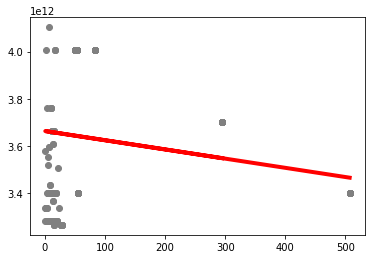

In [ ]:
# plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=4)
plt.show()